In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

In [0]:
#LOADING TRAIN DATA THROUGH ZIP FILE
import zipfile
from google.colab import drive

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Character + Digits data.zip/Character + Digits data/characters-digits-train.zip", 'r')#LOCATION OF FILE
zip_ref.extractall("/content/emnist")#EXTRACT TO EMNIST FOLDER
zip_ref.close()

In [0]:
#LOADING TEST DATA THROUGH ZIP FILE
import zipfile
from google.colab import drive
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Character + Digits data.zip/Character + Digits data/characters-digits-test.zip", 'r')#LOCATION OF FILE
zip_ref.extractall("/content/emnist")#EXTRACT TO EMNIST FOLDER
zip_ref.close()

In [0]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [0]:
train_data_path = '/content/emnist/characters-digits-train.csv'#PATH OF TRAIN DATA
test_data_path = '/content/emnist/characters-digits-test.csv'#PATH OF TEST DATA

In [0]:
train_data = pd.read_csv(train_data_path, header=None)

In [0]:
class_mapping=['digit','digit','digit','digit','digit','digit','digit','digit','digit','digit','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter','letter']


In [10]:
train_data.shape

(112800, 785)

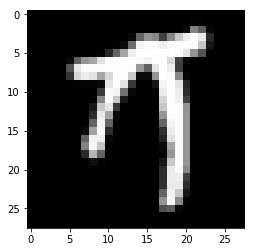

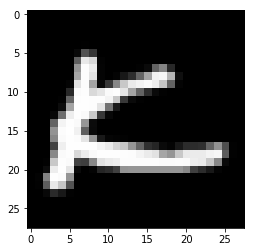

In [11]:
num_classes = len(train_data[0].unique())
row_num = 8

plt.imshow(train_data.values[row_num, 1:].reshape([28, 28]), cmap='Greys_r')
plt.show()

img_flip = np.transpose(train_data.values[row_num,1:].reshape(28, 28), axes=[1,0]) # img_size * img_size arrays
plt.imshow(img_flip, cmap='Greys_r')

plt.show()

In [0]:
def show_img(data, row_num):
    img_flip = np.transpose(data.values[row_num,1:].reshape(28, 28), axes=[1,0]) # img_size * img_size arrays
    plt.title('Class: ' + str(data.values[row_num,0]) + ', Label: ' + str(class_mapping[data.values[row_num,0]]))
    plt.imshow(img_flip, cmap='Greys_r')


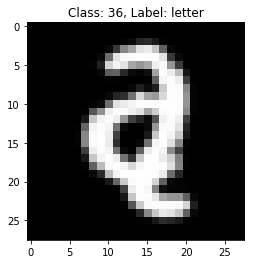

In [13]:
show_img(train_data, 1)

In [0]:
# 10 digits, 26 letters, and 11 capital letters that are different looking from their lowercase counterparts
num_classes = 47 
img_size = 28

def img_label_load(data_path, num_classes=None):
    data = pd.read_csv(data_path, header=None)
    data_rows = len(data)
    if not num_classes:
        num_classes = len(data[0].unique())
    
    # this assumes square imgs. Should be 28x28
    img_size = int(np.sqrt(len(data.iloc[0][1:])))
    
    # Images need to be transposed. This line also does the reshaping needed.
    imgs = np.transpose(data.values[:,1:].reshape(data_rows, img_size, img_size, 1), axes=[0,2,1,3]) # img_size * img_size arrays
    
    labels = keras.utils.to_categorical(data.values[:,0], num_classes) # one-hot encoding vectors
    
    return imgs/255., labels

In [15]:
input_shape=img_size,img_size,1

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(img_size,img_size,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(keras.layers.Conv2D(filters=256, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(img_size,img_size,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=1024, activation='relu'))
model.add(keras.layers.Dropout(.5))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       819456    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 512)         0         
_________________________________________

In [16]:
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 28, 28, 128]
[None, 14, 14, 128]
[None, 14, 14, 256]
[None, 7, 7, 256]
[None, 7, 7, 512]
[None, 3, 3, 512]
[None, 4608]
[None, 1024]
[None, 1024]
[None, 47]


In [17]:


X, y = img_label_load(train_data_path)
print(X.shape)



(112800, 28, 28, 1)


In [27]:
data_generator = keras.preprocessing.image.ImageDataGenerator(validation_split=.2)
data_generator_with_aug = keras.preprocessing.image.ImageDataGenerator(validation_split=.2,
                                            width_shift_range=.2, height_shift_range=.2,
                                            rotation_range=60, zoom_range=.2, shear_range=.3)

training_data_generator = data_generator.flow(X, y, subset='training')
validation_data_generator = data_generator.flow(X, y, subset='validation')
history = model.fit_generator(training_data_generator, 
                              steps_per_epoch=500, epochs=10, # can change epochs to 10
                              validation_data=validation_data_generator)

Epoch 1/10
500/500 [==============================] - 554s 1s/step - loss: 0.3327 - acc: 0.8773 - val_loss: 0.3426 - val_acc: 0.8818
Epoch 2/10
218/500 [============>.................] - ETA: 4:07 - loss: 0.3562 - acc: 0.8739

KeyboardInterrupt: ignored

In [19]:
test_X, test_y = img_label_load(test_data_path)
test_data_generator = data_generator.flow(X, y)

model.evaluate_generator(test_data_generator)


[0.31980411044143614, 0.88233155]

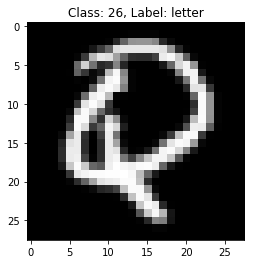

In [20]:
test_data = pd.read_csv(test_data_path, header=None)
show_img(test_data,3)

In [0]:
X_test, y_test = img_label_load(test_data_path)
def run_prediction(idx):
    result = np.argmax(model.predict(X_test[idx:idx+1]))
   
    print('Prediction: ', result, ', Label: ', class_mapping[result])
    print('Target: ', test_data.values[idx,0])
    
    show_img(test_data, idx)

Prediction:  27 , Label:  letter
Target:  11
Prediction:  37 , Label:  letter
Target:  37
Prediction:  39 , Label:  letter
Target:  39
Prediction:  9 , Label:  digit
Target:  9
Prediction:  3 , Label:  digit
Target:  3
Prediction:  45 , Label:  letter
Target:  45
Prediction:  28 , Label:  letter
Target:  28
Prediction:  28 , Label:  letter
Target:  5
Prediction:  4 , Label:  digit
Target:  4


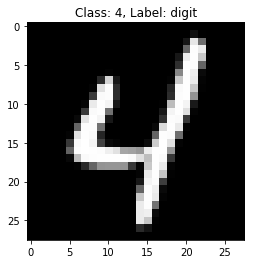

In [22]:
import random

for _ in range(1,10):
    idx = random.randint(0, 47-1)
    run_prediction(idx)

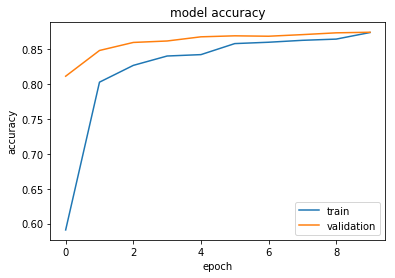

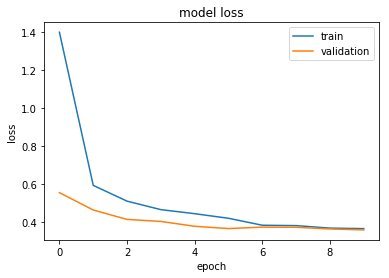

In [23]:
# accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [0]:
from keras.models import load_model

model.save('my_model.h5')

In [25]:
import keras
from keras.models import load_model
import tensorflow as tf 
classifierLoad = tf.keras.models.load_model('my_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
